# Pooled profiling (Karaman + Davis)

We pool activity data from the Karaman and Davis dataset by taking the union of ligand-kinase measurements. If two non-equal measurements per ligand-kinase pair are available 
- if both are below or above a cutoff choosen to split active/inactive kinases, we keep the lowest
- else
  - if both values are $<100$ apart, we keep the lowest 
  - else, we keep the highest

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.data import profiling

In [2]:
ACTIVITY_MAX = 100

## Load individual profiling datasets

In [3]:
df_karaman = profiling.karaman()
df_davis = profiling.davis()

print("Number of ligands (Karaman):", df_karaman.shape[1])
print("Number of ligands (Davis)  :", df_davis.shape[1])
print("Number of shared ligands   :", len(set(df_karaman.columns) & set(df_davis.columns)))
print()
print("Number of kinases (Karaman):", df_karaman.shape[0])
print("Number of kinases (Davis)  :", df_davis.shape[0])
print("Number of shared kinases   :", len(set(df_karaman.index) & set(df_davis.index)))

Number of ligands (Karaman): 30
Number of ligands (Davis)  : 72
Number of shared ligands   : 22

Number of kinases (Karaman): 268
Number of kinases (Davis)  : 350
Number of shared kinases   : 265


## Combine profiling datasets

In [4]:
d_combined = pd.concat([df_karaman, df_davis])
d_combined = (
    d_combined.reset_index()
    .groupby("index")
    .agg(lambda x: [i for i in x.tolist() if not np.isnan(i)])
)
d_combined

,Staurosporine,JNJ-7706621,MLN-8054,PKC-412,SU-14813,SB-202190,CP-724714,VX-680/MK-0457,Dasatinib,Roscovitine/CYC-202,...,PD-173955,Pazopanib,AST-487,GDC-0941,TG-100-115,TAE-684,SKI-606,BIBW-2992,AZD-6244/ARRY-886,AZD-2171
index,,,,,,,,,,,,,,,,,,,,,
AAK1,"[1.2, 1.2]",[200.0],[],"[48.0, 48.0]","[66.0, 66.0]",[],[],"[290.0, 290.0]",[],[],...,[],[2900.0],[],[9100.0],[870.0],[470.0],[2300.0],[],[],[]
ABL1,"[290.0, 22.0]",[1200.0],"[820.0, 890.0]",[],"[1500.0, 620.0]",[],[],"[13.0, 7.5]","[0.53, 0.046]",[],...,[0.58],[650.0],[13.0],[],[],[170.0],[0.057],[570.0],[],[78.0]
ABL2,"[110.0, 110.0]",[],"[3300.0, 3300.0]",[],[],[],[],"[4.0, 4.0]","[0.17, 0.17]",[],...,[0.69],[3000.0],[3.4],[],[],[380.0],[1.5],[],[],[730.0]
ACK,"[16.0, 16.0]",[],[],[120.0],"[4900.0, 4900.0]",[],[],"[4400.0, 4400.0]","[5.6, 5.6]",[],...,[27.0],[],[],[],[],[2.0],[29.0],[],[],[]
ACTR2,[8900.0],[2900.0],[],[],[],[],[],[],"[210.0, 210.0]",[],...,[10.0],[],[],[],[],[2200.0],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p38d,[240.0],[],[],[],[],[],[],[],[],[],...,[],[],[13.0],[],[],[],[],[],[],[]
p38g,"[42.0, 42.0]",[],[],[],[],[3300.0],[],[],[],[],...,[],[],[29.0],[],[],[9400.0],[],[],[],[]
p70S6K,[1.3],[],[],[1300.0],[150.0],[],[],[],[],[],...,[],[],[120.0],[],[],[2700.0],[660.0],[],[],[]


## Look at diverging measurements

In [5]:
d_combined_unstack = d_combined.unstack()
pairs_1 = d_combined_unstack[d_combined_unstack.apply(len) == 1]
pairs_2 = d_combined_unstack[d_combined_unstack.apply(len) == 2]
print("Number of ligand-kinase pairs with 1 measurement              :", len(pairs_1))
print("Number of ligand-kinase pairs with 2 measurements             :", len(pairs_2))
d_combined_unstack = d_combined_unstack[d_combined_unstack.apply(lambda x: len(x) > 1)]
d_combined_unstack_df = pd.DataFrame(
    d_combined_unstack.to_list(), index=d_combined_unstack.index, columns=["karaman", "davis"]
)
d_combined_unstack_df["diff"] = (
    d_combined_unstack_df["karaman"] - d_combined_unstack_df["davis"]
).abs()
d_combined_unstack_df = d_combined_unstack_df.sort_values("diff", ascending=False)
d_combined_unstack_df_diff = d_combined_unstack_df[d_combined_unstack_df["diff"] > 0]
print(
    "Number of ligand-kinase pairs with 2 non-matching measurements:",
    len(d_combined_unstack_df_diff),
)

Number of ligand-kinase pairs with 1 measurement              : 6296
Number of ligand-kinase pairs with 2 measurements             : 1333
Number of ligand-kinase pairs with 2 non-matching measurements: 42


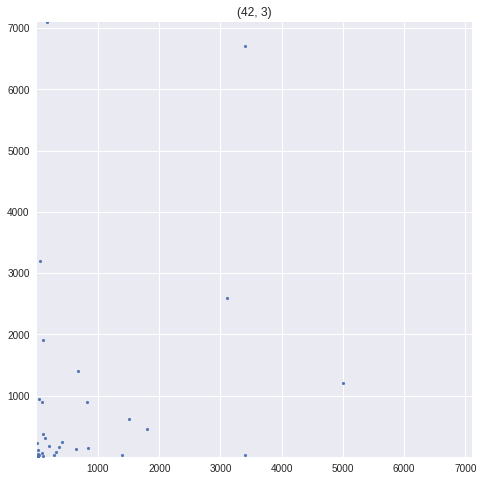

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

plt.scatter(d_combined_unstack_df_diff["karaman"], d_combined_unstack_df_diff["davis"], s=8)
all_values = pd.concat(
    [d_combined_unstack_df_diff["karaman"], d_combined_unstack_df_diff["davis"]]
)
all_values
ax.set_xlim([all_values.min(), all_values.max()])
ax.set_ylim([all_values.min(), all_values.max()])

ax.set_title(d_combined_unstack_df_diff.shape)
ax.set_aspect("equal", adjustable="box")

## Deal with non-equal mulitple measurements

- If _both_ measurements are _below or above_ cutoff, keep lower value
- If _one is below and one above_, keep lower value if difference between values is <100, else keep higher values

In [7]:
def choose_value(x, activity_max=ACTIVITY_MAX):
    if len(x) == 0:
        return None
    elif len(x) == 1:
        return x[0]
    else:
        if x[0] == x[1]:
            return x[0]
        else:
            # If both measurements are below or above cutoff, keep lower value
            if (x[0] > activity_max and x[0] > activity_max) or (
                x[0] <= activity_max and x[0] <= activity_max
            ):
                return min(x)
            # If one is below and one above
            else:
                # Keep lower value if difference between values is <100
                if abs(x[0] - x[1]) <= 100:
                    return min(x)
                # Else keep higher values
                else:
                    return max(x)

In [8]:
d_combined_selected = d_combined.applymap(choose_value)
d_combined_selected

,Staurosporine,JNJ-7706621,MLN-8054,PKC-412,SU-14813,SB-202190,CP-724714,VX-680/MK-0457,Dasatinib,Roscovitine/CYC-202,...,PD-173955,Pazopanib,AST-487,GDC-0941,TG-100-115,TAE-684,SKI-606,BIBW-2992,AZD-6244/ARRY-886,AZD-2171
index,,,,,,,,,,,,,,,,,,,,,
AAK1,1.2,200.0,NaN,48.0,66.0,NaN,NaN,290.0,NaN,NaN,...,NaN,2900.0,NaN,9100.0,870.0,470.0,2300.000,NaN,NaN,NaN
ABL1,22.0,1200.0,820.0,NaN,620.0,NaN,NaN,7.5,0.046,NaN,...,0.58,650.0,13.0,NaN,NaN,170.0,0.057,570.0,NaN,78.0
ABL2,110.0,NaN,3300.0,NaN,NaN,NaN,NaN,4.0,0.170,NaN,...,0.69,3000.0,3.4,NaN,NaN,380.0,1.500,NaN,NaN,730.0
ACK,16.0,NaN,NaN,120.0,4900.0,NaN,NaN,4400.0,5.600,NaN,...,27.00,NaN,NaN,NaN,NaN,2.0,29.000,NaN,NaN,NaN
ACTR2,8900.0,2900.0,NaN,NaN,NaN,NaN,NaN,NaN,210.000,NaN,...,10.00,NaN,NaN,NaN,NaN,2200.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p38d,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p38g,42.0,NaN,NaN,NaN,NaN,3300.0,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,9400.0,NaN,NaN,NaN,NaN
p70S6K,1.3,NaN,NaN,1300.0,150.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,120.0,NaN,NaN,2700.0,660.000,NaN,NaN,NaN


## Load data from `kissim_app.src`

In [9]:
df_karaman_davis = profiling.karaman_davis()
df_karaman_davis

,Staurosporine,JNJ-7706621,MLN-8054,PKC-412,SU-14813,SB-202190,CP-724714,VX-680/MK-0457,Dasatinib,Roscovitine/CYC-202,...,PD-173955,Pazopanib,AST-487,GDC-0941,TG-100-115,TAE-684,SKI-606,BIBW-2992,AZD-6244/ARRY-886,AZD-2171
AAK1,1.2,200.0,NaN,48.0,66.0,NaN,NaN,290.0,NaN,NaN,...,NaN,2900.0,NaN,9100.0,870.0,470.0,2300.000,NaN,NaN,NaN
ABL1,22.0,1200.0,820.0,NaN,620.0,NaN,NaN,7.5,0.046,NaN,...,0.58,650.0,13.0,NaN,NaN,170.0,0.057,570.0,NaN,78.0
ABL2,110.0,NaN,3300.0,NaN,NaN,NaN,NaN,4.0,0.170,NaN,...,0.69,3000.0,3.4,NaN,NaN,380.0,1.500,NaN,NaN,730.0
ACK,16.0,NaN,NaN,120.0,4900.0,NaN,NaN,4400.0,5.600,NaN,...,27.00,NaN,NaN,NaN,NaN,2.0,29.000,NaN,NaN,NaN
ACTR2,8900.0,2900.0,NaN,NaN,NaN,NaN,NaN,NaN,210.000,NaN,...,10.00,NaN,NaN,NaN,NaN,2200.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p38d,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p38g,42.0,NaN,NaN,NaN,NaN,3300.0,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,9400.0,NaN,NaN,NaN,NaN
p70S6K,1.3,NaN,NaN,1300.0,150.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,120.0,NaN,NaN,2700.0,660.000,NaN,NaN,NaN
skMLCK,61.0,NaN,NaN,NaN,190.0,NaN,NaN,43.0,3500.000,NaN,...,190.00,2000.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
